Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов

In [3]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from comet_ml import Experiment

# Создадим новый эксперимент. Это будет второй эксперимент, т.к. первый был прогонкой учебного ноутбука
experiment = Experiment(
    api_key='BCdwvaeXUiJXwefLVND0RAzHL',
    project_name='medical-appointment',
    workspace='killri',
)

# Загрузим данные и посмотрим на них
df = pd.read_csv('KaggleV2-May-2016.csv')
df.info()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/killri/medical-appointment/189dd984f3324fad8dd13a34c8d81e69



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


По заданию нас интересуют только 7 числовых признаков:
1. Age
2. Scholarship
3. Hipertension
4. Diabetes
5. Alcoholism 
6. Handcap 
7. SMS_received

In [5]:
#Удалим все "лишние" признаки, чтобы составить матрицу корреляций 
df.drop(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay','AppointmentDay', 'Neighbourhood', 'No-show'], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           110527 non-null  int64
 1   Scholarship   110527 non-null  int64
 2   Hipertension  110527 non-null  int64
 3   Diabetes      110527 non-null  int64
 4   Alcoholism    110527 non-null  int64
 5   Handcap       110527 non-null  int64
 6   SMS_received  110527 non-null  int64
dtypes: int64(7)
memory usage: 5.9 MB


{'web': 'https://www.comet.com/api/image/download?imageId=a3549cbf7b724686852dfc2252dbc156&experimentKey=189dd984f3324fad8dd13a34c8d81e69',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=a3549cbf7b724686852dfc2252dbc156&experimentKey=189dd984f3324fad8dd13a34c8d81e69',
 'imageId': 'a3549cbf7b724686852dfc2252dbc156'}

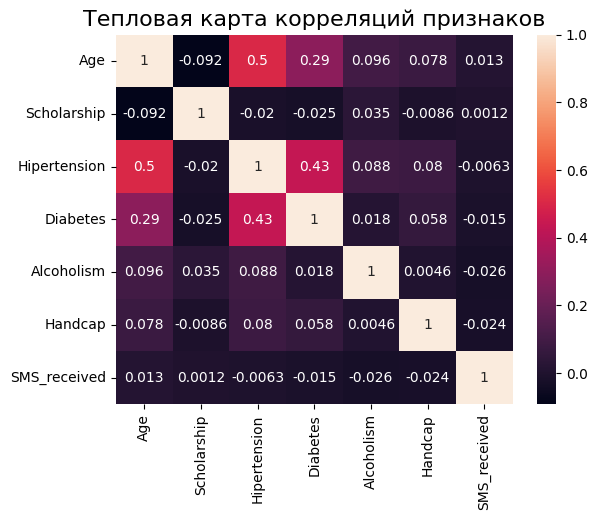

In [11]:
corr_matrix = df.corr()
heatmap = sns.heatmap(data=corr_matrix, annot=True)
heatmap.set_title('Тепловая карта корреляций признаков', fontsize=16);
experiment.log_figure(figure=plt)

In [12]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/killri/medical-appointment/189dd984f3324fad8dd13a34c8d81e69
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (34.92 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
